In [ ]:
Task 1: Data Exploration and Cleaning

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data= pd.read_csv(r"C:\Users\USER\Downloads\Huza\Homework 9\netflix_titles.csv" , encoding="ISO-8859-1")
data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,5-Apr-24,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [100]:
# Create a mask for the specific values
mask = data['rating'].isin(['74 min', '84 min', '66 min'])

# Move the data to the existing 'duration' column and replace values in 'rating' with NaN
data.loc[mask, 'duration'] = data.loc[mask, 'rating']
data.loc[mask, 'rating'] = np.nan

In [101]:
data['rating'].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR', 'A'],
      dtype=object)

In [102]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [103]:

data.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
}, inplace=True)

In [104]:
most_frequent_date = data['date_added'].mode()[0]
data['date_added'].fillna(most_frequent_date,inplace=True)

In [105]:
most_frequent_rating = data['rating'].mode()[0]
data['rating'].fillna(most_frequent_rating,inplace=True)

In [106]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [107]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [108]:
 title_type_counts=data['type'].value_counts() 

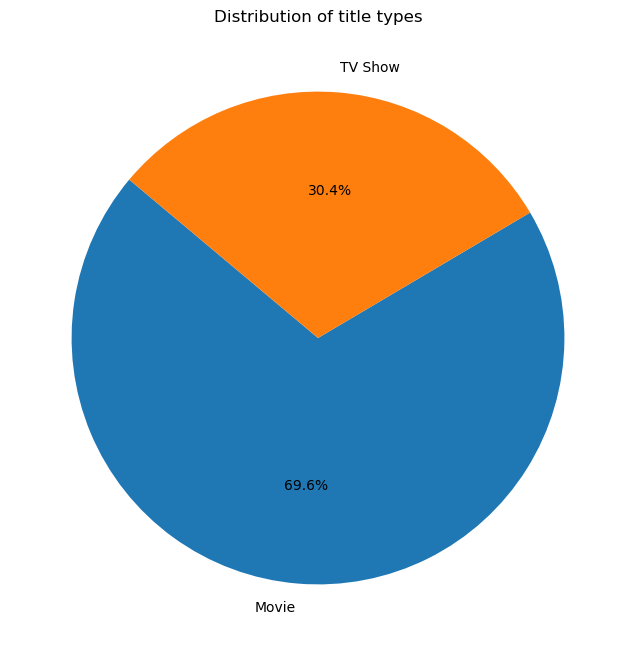

In [109]:
plt.figure(figsize=(8, 8))
plt.pie(title_type_counts, labels=title_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of title types')
plt.show()

In [110]:
#Data type consistenc
data['release_year'] = data['release_year'].astype(int)
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')


In [111]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [112]:
def convert_duration(duration, type):
    if pd.isnull(duration):
        return None
    if type == 'Movie':
        return int(duration.replace(' min', ''))
    if type == 'TV Show':
        return int(duration.replace(' Seasons', '').replace(' Season', ''))
    return None

data['duration'] = data.apply(lambda row: convert_duration(row['duration'], row['type']), axis=1)


# Impute 'duration' based on the median duration of the respective type
median_duration_movie = data[data['type'] == 'Movie']['duration'].median()
median_duration_tv_show = data[data['type'] == 'TV Show']['duration'].median()

data.loc[(data['type'] == 'Movie') & (data['duration'].isnull()), 'duration'] = median_duration_movie
data.loc[(data['type'] == 'TV Show') & (data['duration'].isnull()), 'duration'] = median_duration_tv_show

In [113]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [114]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,2024-04-05,2024,TV-MA,1,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [115]:
data.groupby('type').describe()

date_added                                                      \
             count                           mean                  min   
type                                                                     
Movie         6132  2019-05-07 10:34:17.142856960  2008-01-01 00:00:00   
TV Show       2677  2019-06-10 21:44:26.716473856  2008-02-04 00:00:00   

                                                                        \
                         25%                  50%                  75%   
type                                                                     
Movie    2018-04-01 00:00:00  2019-06-19 12:00:00  2020-07-24 00:00:00   
TV Show  2018-04-27 00:00:00  2019-08-16 00:00:00  2020-10-01 00:00:00   

                                  release_year               ...          \
                         max  std        count         mean  ...     max   
type                                                         ...           
Movie    2024-04-05 00:00:00  NaN       6132.0  2013.121657  ...  2021.0   
TV Show  2024-04-05 00:00:00  NaN       2677.0  2016.608517  ...  2024.0   

                  duration                                            \
              std    count       mean  min   25%   50%    75%    max   
type                                                                   
Movie    9.677387   6132.0  99.566699  3.0  87.0  98.0  114.0  312.0   
TV Show  5.740845   2677.0   1.764662  1.0   1.0   1.0    2.0   17.0   

                    
               std  
type                
Movie    28.287511  
TV Show   1.582525  

[2 rows x 24 columns]

In [116]:
data['type'].value_counts()


type
Movie      6132
TV Show    2677
Name: count, dtype: int64

Task2:Data Visualization

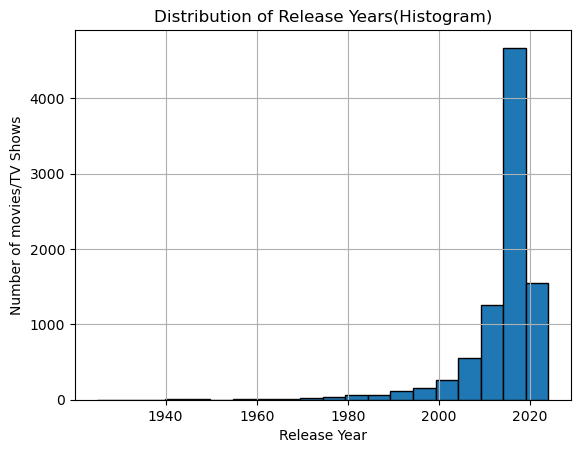

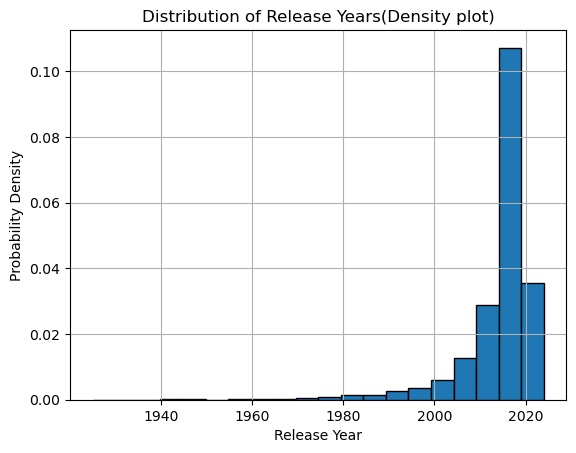

In [117]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(8, 6))

# Histogram (shows count of data points in each bin)
plt.hist(data['release_year'], bins=20, edgecolor='black')  # Adjust 'bins' for desired granularity
plt.xlabel('Release Year')
plt.ylabel('Number of movies/TV Shows')
plt.title('Distribution of Release Years(Histogram)')
plt.grid(True)
plt.show()

# Density plot (shows probability density)
plt.hist(data['release_year'], bins=20, density=True, edgecolor='black')

# Customize the plot (optional)
plt.xlabel('Release Year')
plt.ylabel('Probability Density')
plt.title('Distribution of Release Years(Density plot)')
plt.grid(True)

# Display the plot
plt.show()


2.2. Rating by type

In [118]:
# Group data by type and rating, then count occurrences
rating_counts = data.groupby(['type', 'rating']).size().unstack()
rating_counts
#data[data['type']]==['TV show']['rating']

rating,A,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,
Movie,1.0,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2067.0,540.0,131.0,139.0,5.0,3.0
TV Show,NaN,NaN,NaN,5.0,NaN,NaN,2.0,733.0,94.0,1148.0,323.0,176.0,195.0,1.0,NaN


2.2.Bar chart

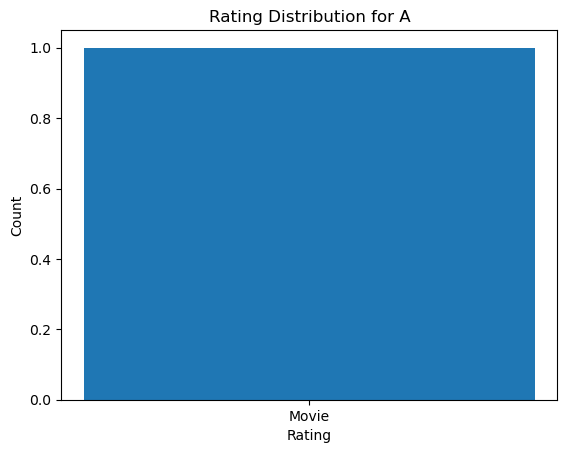

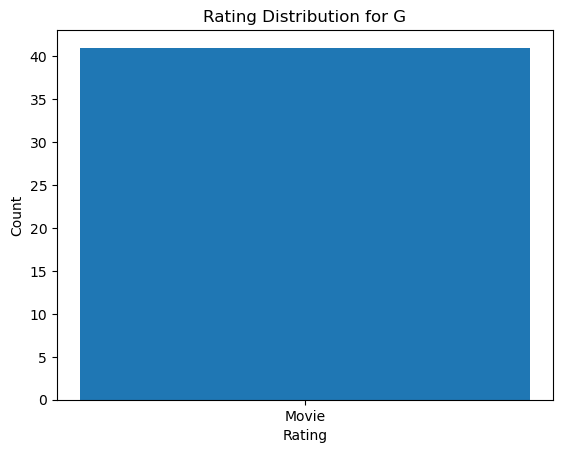

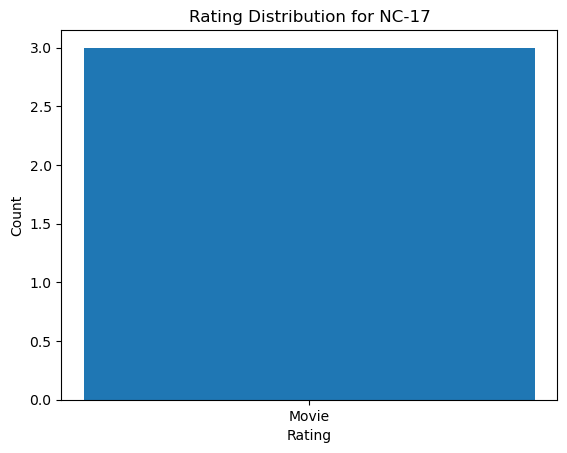

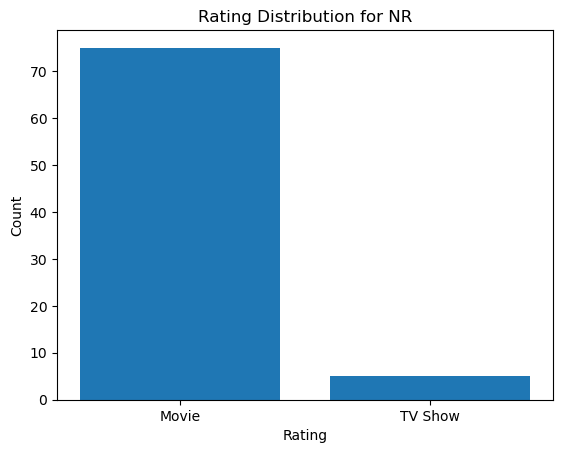

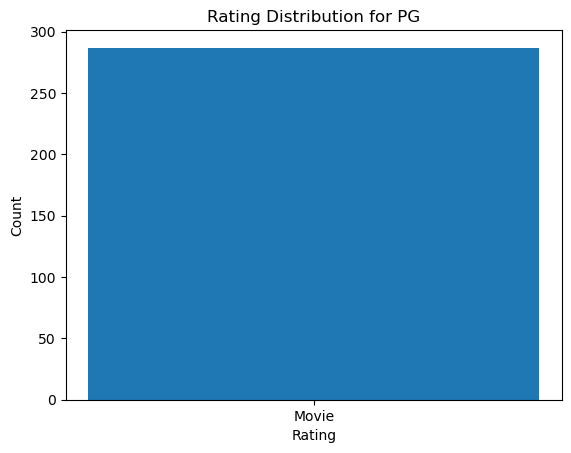

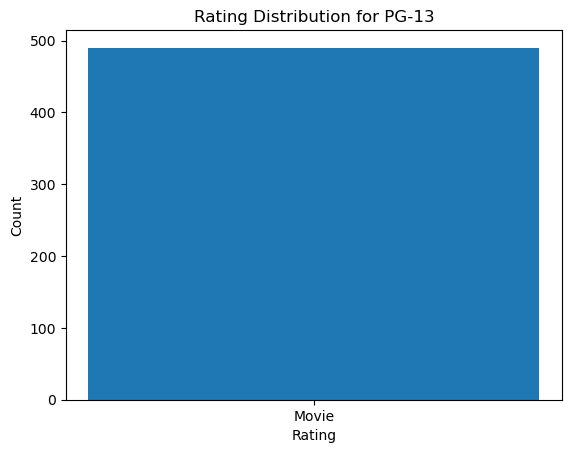

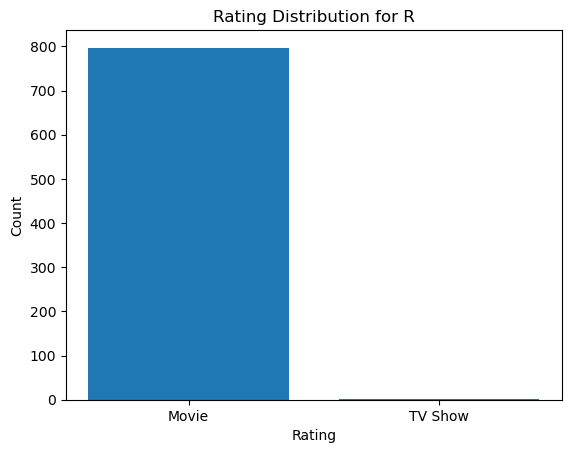

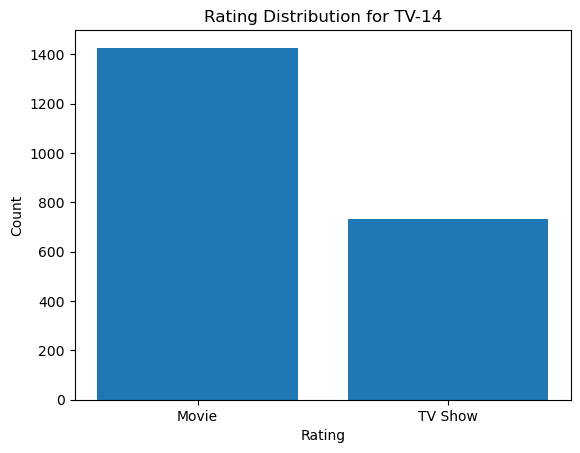

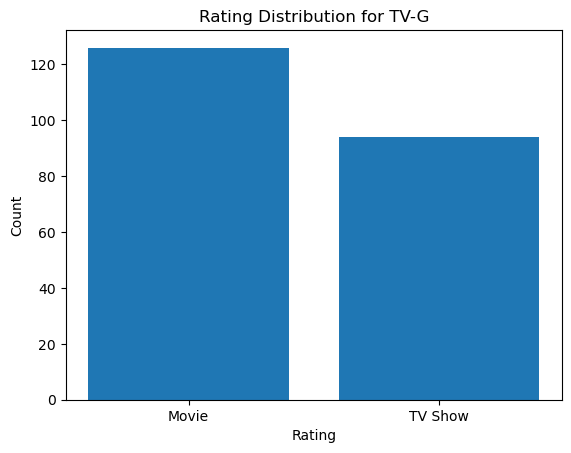

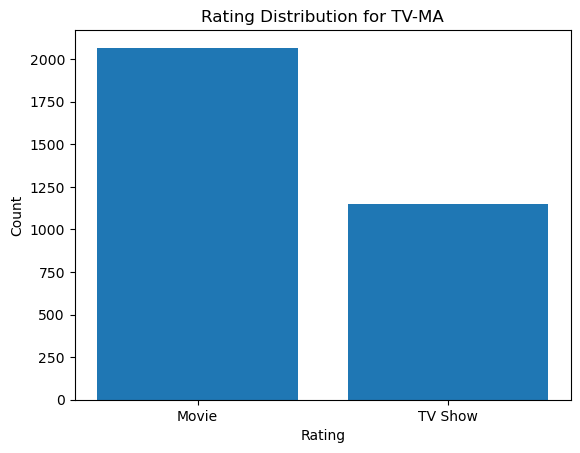

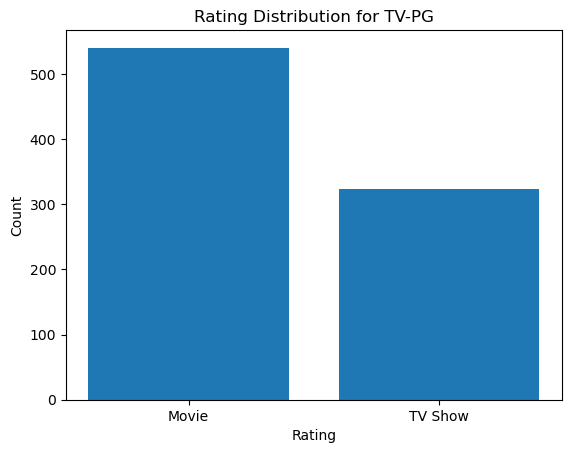

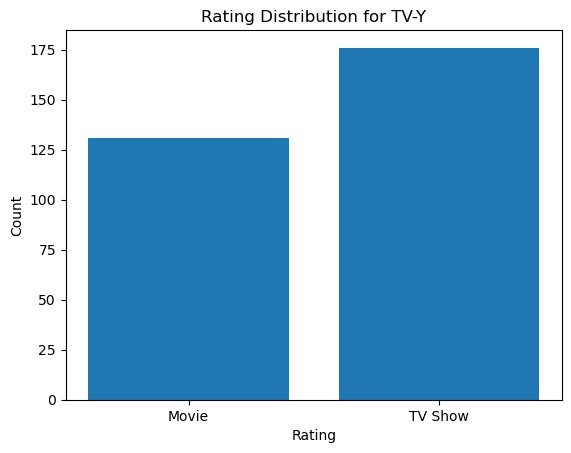

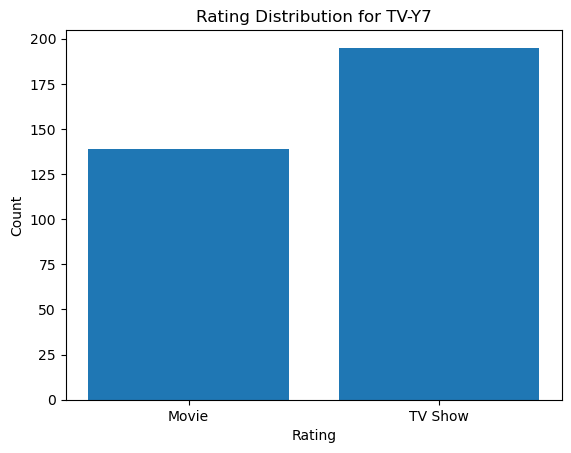

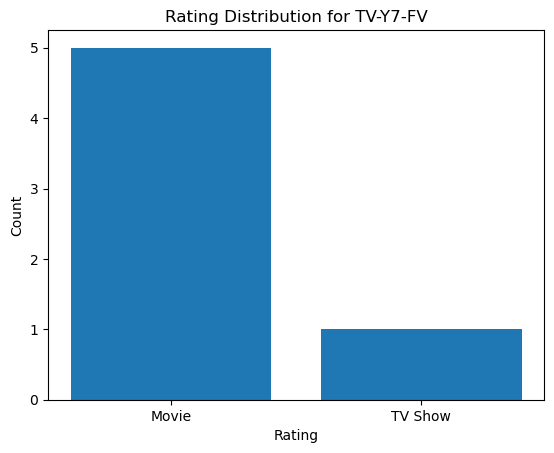

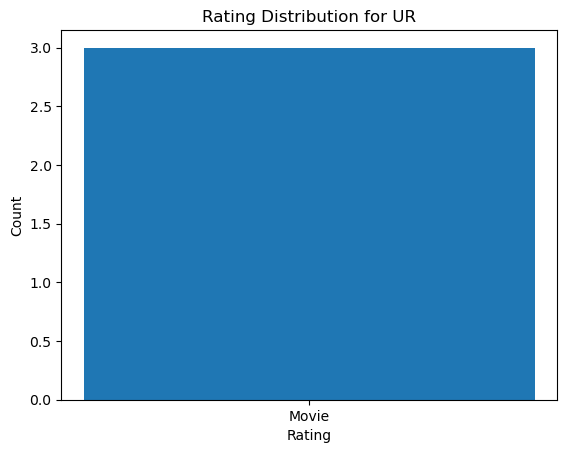

In [119]:


# Create separate bar charts for each type (Movie/TV Show)
types = rating_counts.columns

for type in types:
  plt.bar(rating_counts.index, rating_counts[type])
  plt.xlabel('Rating')
  plt.ylabel('Count')
  plt.title(f'Rating Distribution for {type}')
  plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
  plt.show()

2.3. relationship between duration and rating

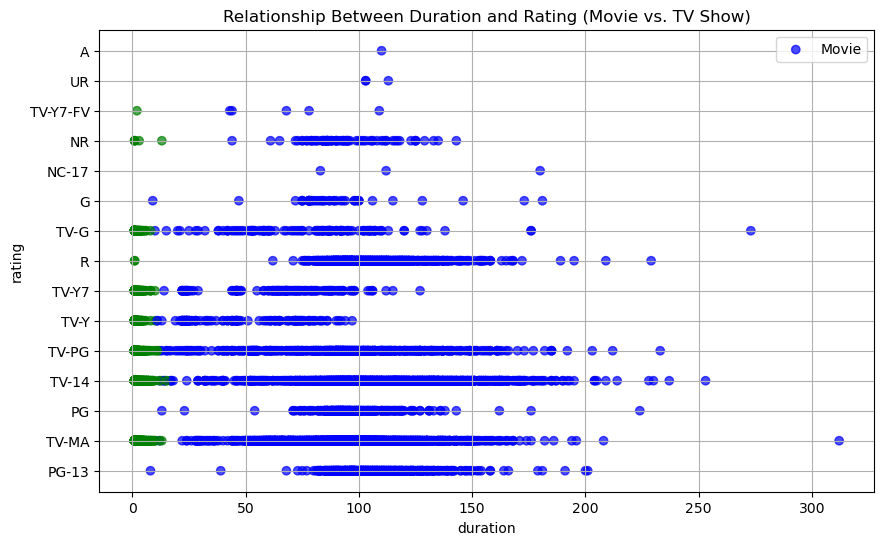

In [120]:
# Create scatter plot with colors to distinguish categories
plt.figure(figsize=(10, 6))
colors = ['b' if cat == 'Movie' else 'g' for cat in data['type']]
plt.scatter(data['duration'], data['rating'], c=colors, alpha=0.7)

# Add labels and title
plt.xlabel('duration')
plt.ylabel('rating')
plt.title('Relationship Between Duration and Rating (Movie vs. TV Show)')

# Add legend
plt.legend(['Movie', 'TV Show'])

# Display plot
plt.grid(True)
plt.show()

2.4.	Genre Exploration:


In [121]:
data['listed_in'] =data['listed_in'].str.split(', ')
data['listed_in'].explode().value_counts() 

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

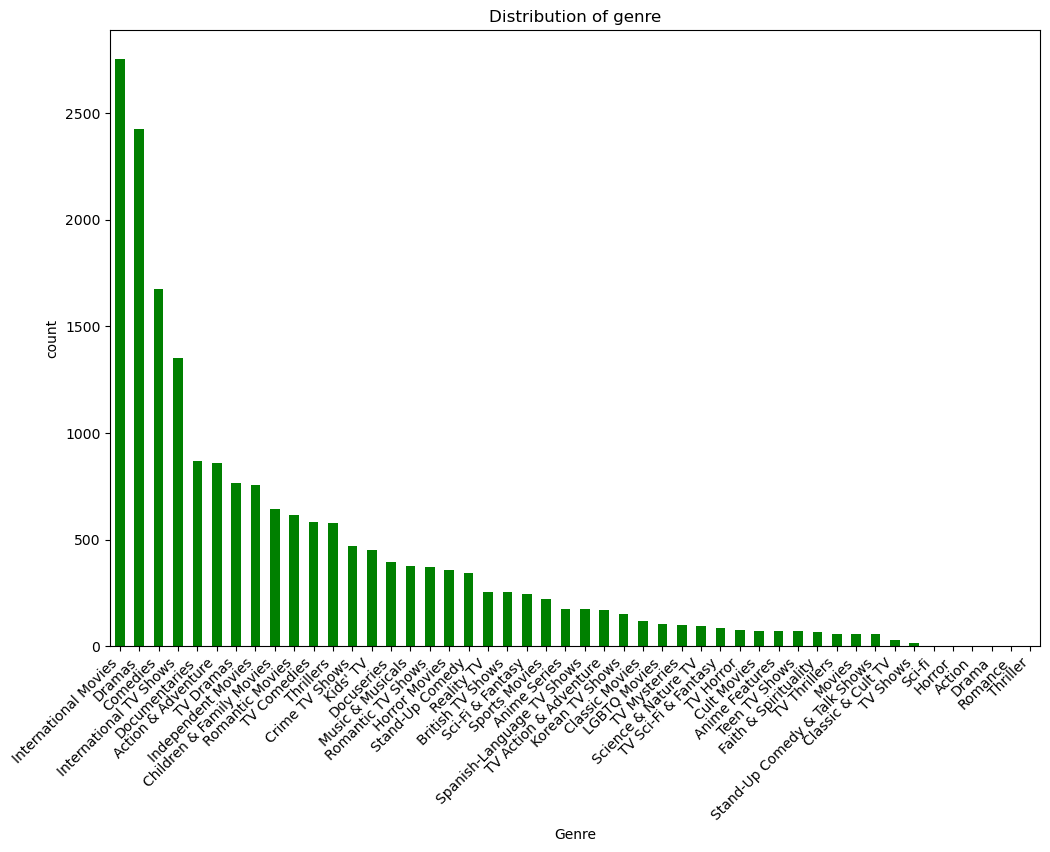

In [122]:
plt.figure(figsize=(12,8))
data['listed_in'].explode().value_counts().plot(kind='bar',color='green')
plt.title('Distribution of genre')
plt.xlabel('Genre')
plt.ylabel('count')
plt.xticks(rotation=45,ha='right')
plt.show()

In [123]:
!pip install WordCloud

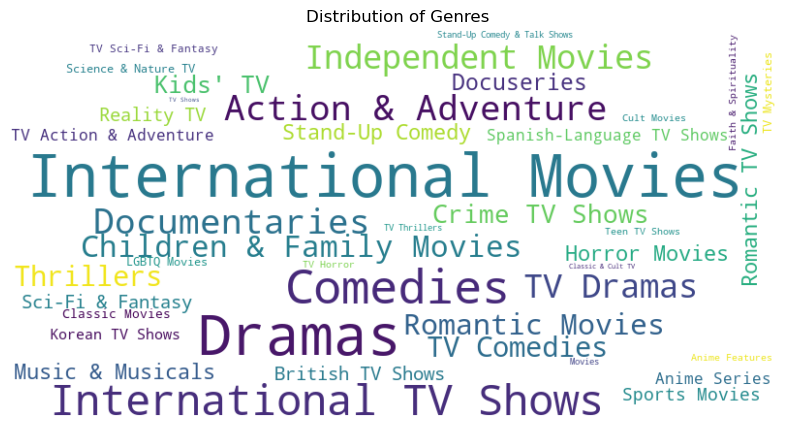

In [124]:
from wordcloud import WordCloud

# Create a word cloud to visualize the distribution of genres
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data['listed_in'].explode().value_counts())

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribution of Genres')
plt.show()

Task3:: : Building a Simple Recommendation Model

In [127]:
rating_mapping = {
    'TV-G': 0,
    'NR': 0,
    'UR': 0,
    'TV-Y': 0,
    'G': 0,
    'PG': 1,
    'TV-PG': 1,
     'PG-13': 2,
    'TV-Y7': 3,
    'TV-Y7-FV': 3,
     'TV-14': 4,
    'R': 5,
    'TV-MA': 6,
    'A': 6,
    'NC-17': 6
}


data['rating_numeric'] = data['rating'].map(rating_mapping)

In [128]:
from sklearn.preprocessing import LabelEncoder


# One-hot encode 'type'
data_type_encoded = pd.get_dummies(data['type'], prefix='type')

# One-hot encode 'country'
data_country_encoded = pd.get_dummies(data['country'], prefix='country')

# Explode 'listed_in' back to original dataframe for one-hot encoding
data_exploded = data.explode('listed_in')

# One-hot encode 'listed_in' (genres)
data_genres_encoded = pd.get_dummies(data_exploded['listed_in'], prefix='genre')

# Aggregate one-hot encoded genres back to the original dataframe, excluding non-numerical columns from the sum
data_exploded = data_exploded[['show_id']].join(data_genres_encoded)

# Label encode 'director'
le = LabelEncoder()
data['director'] = le.fit_transform(data['director'])

# Join the numerical columns with the original dataframe, ensuring no duplicate columns
data_final = data_exploded.groupby('show_id').sum(numeric_only=True).join(data.set_index('show_id')[['release_year', 'duration', 'rating_numeric']], on='show_id', lsuffix='_left')

# Display the final dataframe
print(data_final.head())

         genre_Action  genre_Action & Adventure  genre_Anime Features  \
show_id                                                                 
s1                  0                         0                     0   
s10                 0                         0                     0   
s100                0                         0                     0   
s1000               0                         0                     0   
s1001               0                         2                     0   

         genre_Anime Series  genre_British TV Shows  \
show_id                                               
s1                        0                       0   
s10                       0                       0   
s100                      0                       0   
s1000                     0                       0   
s1001                     0                       0   

         genre_Children & Family Movies  genre_Classic & Cult TV  \
show_id                           

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming data_final contains the preprocessed dataframe with features and ratings

# Separate the target variable (ratings - y) from the features (X)
X = data_final.drop(columns=['rating_numeric'])
y = data_final['rating_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you've defined and trained your model (e.g., Linear Regression) and stored it in 'model'

# 1. Train your machine learning model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# 3. Calculate evaluation metrics
# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared: 0.31452274589885587
Mean Squared Error: 2.8251586803316946
